In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Examining dataset
weather_df = pd.read_csv("pp_weather.csv")
weather_df.head(10)

,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
1,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
3,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
4,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0
5,2.5,4.4,2.2,2.2,1,2012,6,4,0,0,1,0,0
6,0.0,7.2,2.8,2.3,1,2012,7,5,0,0,1,0,0
7,0.0,10.0,2.8,2.0,1,2012,8,6,0,0,0,0,1
8,4.3,9.4,5.0,3.4,1,2012,9,0,0,0,1,0,0
9,1.0,6.1,0.6,3.4,1,2012,10,1,0,0,1,0,0


In [3]:
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_df)

In [14]:
#creating elbow plot

inertia = []
k = list(range(1,11))


for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_data)
    inertia.append(k_model.inertia_)

# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data dictionary
df_elbow = pd.DataFrame(elbow_data)

# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)


:Curve   [k]   (inertia)

In [5]:
 # Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=3, random_state=1)
model

KMeans(n_clusters=3, random_state=1)

In [7]:
#fit the data to the instance of the model
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [8]:
weather_predict= model.predict(scaled_data)

In [9]:
#creating a copy of the dataframe and adding the predictions

weather_predict_df = weather_df.copy()
weather_predict_df["cluster"] = weather_predict

weather_predict_df.head()

,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun,cluster
0,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0,1
1,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0,2
2,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0,2
3,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0,2
4,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0,2


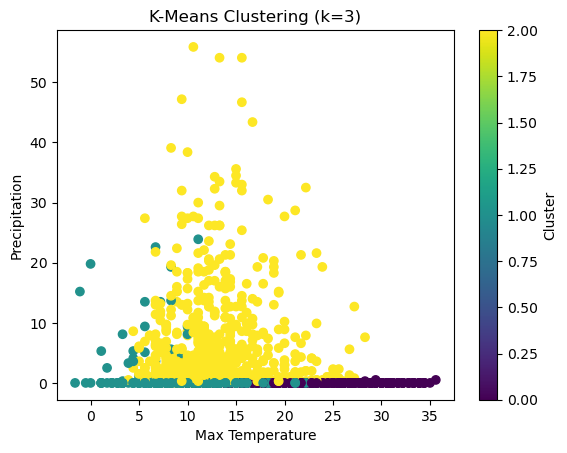

In [12]:
# Plot the clusters
plt.scatter(weather_predict_df['temp_max'], weather_predict_df['precipitation'], c=weather_predict_df['cluster'], cmap='viridis')
plt.xlabel('Max Temperature')
plt.ylabel('Precipitation')
plt.title('K-Means Clustering (k=3)')
plt.colorbar(label='Cluster')
plt.show()

**LOGISTIC REGRESSION**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

In [5]:
#create the y and x values toto predict if its going to rain x independent variables, y dependent
X = weather_df.drop(columns = ["weather_rain", "weather_drizzle", "weather_fog", "weather_snow", "weather_sun"])
y= weather_df["weather_rain"]

In [6]:
#split the data into training and testing sets, splitting it as 75/25 for training testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [7]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver = "lbfgs", max_iter =200, random_state =1)
# Train the model
model

LogisticRegression(max_iter=200, random_state=1)

In [8]:
#fitting the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [9]:
#predictions for the test set 
y_predict= model.predict(X_test)

In [10]:
#score the model using the testing data
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.845662100456621
Testing Data Score: 0.8469945355191257


In [11]:
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,1,0
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


In [45]:
# evaluate the model for weather_rain
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))

Accuracy: 0.8469945355191257
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       208
           1       0.87      0.76      0.81       158

    accuracy                           0.85       366
   macro avg       0.85      0.84      0.84       366
weighted avg       0.85      0.85      0.85       366

Confusion Matrix:
 [[190  18]
 [ 38 120]]


In [59]:
#to interpret the confusion matrix
"""
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted that it would not rain 190 times.
False positives- the model incorrectly predicted that it would rain when there was actually no rain 18 times.
False negatives- the model incorrectly predicted no rain when it actually rained 38 times.
True positives- the model correctly predicted that it rained 120 times.


The model preformed well overall with an accuracy of 84.7%
The dataset is slightly imbalanced with 208 no rain versus 158 rain but the model results are reasonably balanced.
the no rain has precision of 83%, the rain model has a precision of 87%.
"""

'\nThis matrix shows the counts of true vs. predicted classifications:\nTrue negatives- the model correctly predicted that it would not rain 190 times.\nFalse positives- the model incorrectly predicted that it would rain when there was actually no rain 18 times.\nFalse negatives- the model incorrectly predicted no rain when it actually rained 38 times.\nTrue positives- the model correctly predicted that it rained 120 times.\n\n\nThe model preformed well overall with an accuracy of 84.7%\nThe dataset is slightly imbalanced with 208 no rain versus 158 rain but the model results are reasonably balanced.\nthe no rain has precision of 83%, the rain model has a precision of 87%.\n'

In [46]:
def run_logistic_regression(weather_df, target_column):
     #putting the codes from above in this function
    X = weather_df.drop(columns=["weather_rain", "weather_drizzle", "weather_fog", "weather_snow", "weather_sun"])
    y = weather_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #had to add this otherwise the function does not work
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    model = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=1, class_weight="balanced")
    model.fit(X_train_resampled, y_train_resampled)


    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    clf_report = classification_report(y_test, y_predict)
    conf_matrix = confusion_matrix(y_test, y_predict)


    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(clf_report)
    print("Confusion Matrix:")
    print(conf_matrix)

In [47]:
#try running for another input such as weather_drizzle
run_logistic_regression(weather_df, "weather_drizzle")

Accuracy: 0.7432

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       357
           1       0.06      0.67      0.11         9

    accuracy                           0.74       366
   macro avg       0.53      0.71      0.48       366
weighted avg       0.97      0.74      0.83       366

Confusion Matrix:
[[266  91]
 [  3   6]]


In [62]:
"""
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted that it will not drizzle 266 times.
False positives- the model incorrectly predicted that it drizzled when it didn't 91 times.
False negatives- the model incorrectly predicted no drizzle when it drizzled 3 times.
True positives- the model correctly predicted that it drizzled 6 times.
Summary

The has an accuracy of 74.3% which is misleadingly high since the model performed extremely well on the no drizzle class but poorly for the drizzle class,
therefore skewing the accuracy results.
The no drizzle model has a high precision of 99% but the no drizzle model has a low precision of 6&.
The model is very imbalanced with 357 no drizzle compared to 8 drizzled, therefore it struggles to predict whether it drizzled or not 
"""

"\nThis matrix shows the counts of true vs. predicted classifications:\nTrue negatives- the model correctly predicted that it will not drizzle 266 times.\nFalse positives- the model incorrectly predicted that it drizzled when it didn't 91 times.\nFalse negatives- the model incorrectly predicted no drizzle when it drizzled 3 times.\nTrue positives- the model correctly predicted that it drizzled 6 times.\nSummary\n\nThe has an accuracy of 74.3% which is misleadingly high since the model performed extremely well on the no drizzle class but poorly for the drizzle class,\ntherefore skewing the accuracy results.\nThe no drizzle model has a high precision of 99% but the no drizzle model has a low precision of 6&.\nThe model is very imbalanced with 357 no drizzle compared to 8 drizzled, therefore it struggles to predict whether it drizzled or not \n"

In [48]:
#try running for another input such as weather_fog
run_logistic_regression(weather_df, "weather_fog")

Accuracy: 0.7158

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       338
           1       0.17      0.68      0.27        28

    accuracy                           0.72       366
   macro avg       0.57      0.70      0.55       366
weighted avg       0.90      0.72      0.78       366

Confusion Matrix:
[[243  95]
 [  9  19]]


In [63]:
"""
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted no fog 243 times.
False positives- the model incorrectly predicted fog 95 times when it was not foggy.
False negatives- the model incorrectly predicted no fog when it was actually foggy 9 times.
True positives- the model correctly predicted fog 19 times.
Summary
The model is very imbalanced with 338 no fog samples and 28 fog samples, therefore it struggles to predict fog accurately and skews the accuracy 
of the model to being higher at 71.5%.
The no fog model has a high precision of 96% and the model for fog has a low precision of 17%.
The model has an accuracy of 71% which is misleadingly high because of the no fog class performing well and skewing the results.
"""

'\nThis matrix shows the counts of true vs. predicted classifications:\nTrue negatives- the model correctly predicted no fog 243 times.\nFalse positives- the model incorrectly predicted fog 95 times when it was not foggy.\nFalse negatives- the model incorrectly predicted no fog when it was actually foggy 9 times.\nTrue positives- the model correctly predicted fog 19 times.\nSummary\nThe model is very imbalanced with 338 no fog samples and 28 fog samples, therefore it struggles to predict fog accurately and skews the accuracy \nof the model to being higher at 71.5%.\nThe no fog model has a high precision of 96% and the model for fog has a low precision of 17%.\nThe model has an accuracy of 71% which is misleadingly high because of the no fog class performing well and skewing the results.\n'

In [49]:
#try running for another input such as weather_snow
run_logistic_regression(weather_df, "weather_snow")

Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       362
           1       0.11      0.75      0.19         4

    accuracy                           0.93       366
   macro avg       0.55      0.84      0.58       366
weighted avg       0.99      0.93      0.96       366

Confusion Matrix:
[[338  24]
 [  1   3]]


In [64]:
"""
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted no snow 338 times.
False positives- the model incorrectly predicted snow when there was no snow 24 times.
False negatives- the model incorrectly predicted no snow when there was actually snow 1 time.
True positives- the model correctly predicted snow 3 times.
Summary
The model is very imbalanced with 362 instances of no snow versus 4 snow days, therefore it struggles to predict snow due to the small sample size.
This imbalance along with the almost perfect precision score of the no snow class skews the accuracy of this model to being extremely high at 93.1%.
"""

'\nThis matrix shows the counts of true vs. predicted classifications:\nTrue negatives- the model correctly predicted no snow 338 times.\nFalse positives- the model incorrectly predicted snow when there was no snow 24 times.\nFalse negatives- the model incorrectly predicted no snow when there was actually snow 1 time.\nTrue positives- the model correctly predicted snow 3 times.\nSummary\nThe model is very imbalanced with 362 instances of no snow versus 4 snow days, therefore it struggles to predict snow due to the small sample size.\nThis imbalance along with the almost perfect precision score of the no snow class skews the accuracy of this model to being extremely high at 93.1%.\n'

In [50]:
#try running for another input such as weather_sun
run_logistic_regression(weather_df, "weather_sun")

Accuracy: 0.8251

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       199
           1       0.75      0.92      0.83       167

    accuracy                           0.83       366
   macro avg       0.84      0.83      0.83       366
weighted avg       0.84      0.83      0.82       366

Confusion Matrix:
[[148  51]
 [ 13 154]]


In [56]:
"""
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly no sun 148 times.
False positives- the model incorrectly sun when there was no sun 51 times.
False negatives- the model incorrectly predicted no sun when there was sun 13 times.
True positives- the model correctly predicted sun 154 times.
Summary
The model is very balanced with 199 no sun versus 167 sun days, therefore it didnt have a bias in prediction. 
"""

'\nThis matrix shows the counts of true vs. predicted classifications:\nTrue negatives- the model correctly no sun 148 times.\nFalse positives- the model incorrectly sun when there was no sun 51 times.\nFalse negatives- the model incorrectly predicted no sun when there was sun 13 times.\nTrue positives- the model correctly predicted sun 154 times.\nSummary\nThe model is very balanced with 199 no sun versus 167 sun days, therefore it didnt have a bias in prediction. \n'